Initial shape: (20640, 10)
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 55332458496.0000 - mae: 205440.1094 - val_loss: 53092835328.0000 - val_mae: 200050.2344
Epoch 2/30
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48954621952.0000 - mae: 191244.2812 - val_loss: 33444483072.0000 - val_mae: 153301.9531
Epoch 3/30
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27336869888.0000 - mae: 135367.5781 - val_loss: 15179076608.0000 - val_mae: 95599.7031
Epoch 4/30
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13125356544.0000 - mae: 87883.6172 - val_loss: 10716537856.0000 - val_mae: 78691.2266
Epoch 5/30
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10119667712.0000 - mae: 76220.8984 - val_loss: 9429811200.0000 - val_mae: 72502.0703
Epoch 6/30
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8692643840.0000 - mae: 70049.4688 - val_loss: 8494870016.0000 - val_mae: 67956.7812
Epoch 7/30
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8095731200.0000 - mae: 66620.2422 - val_loss: 7753548800.0000 - val_mae: 

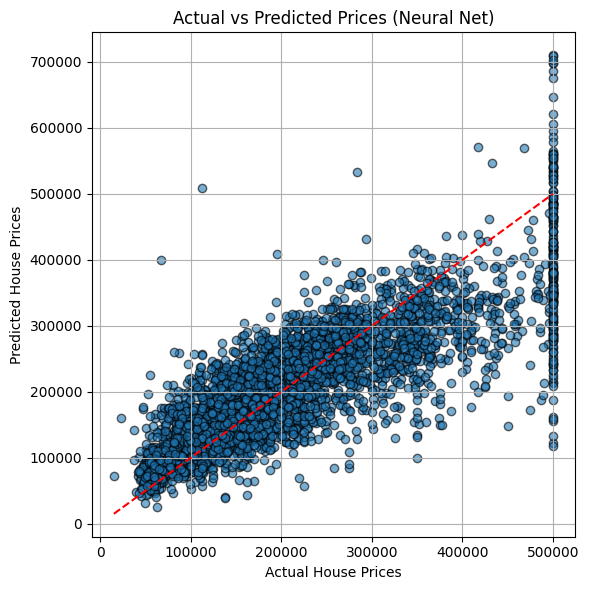

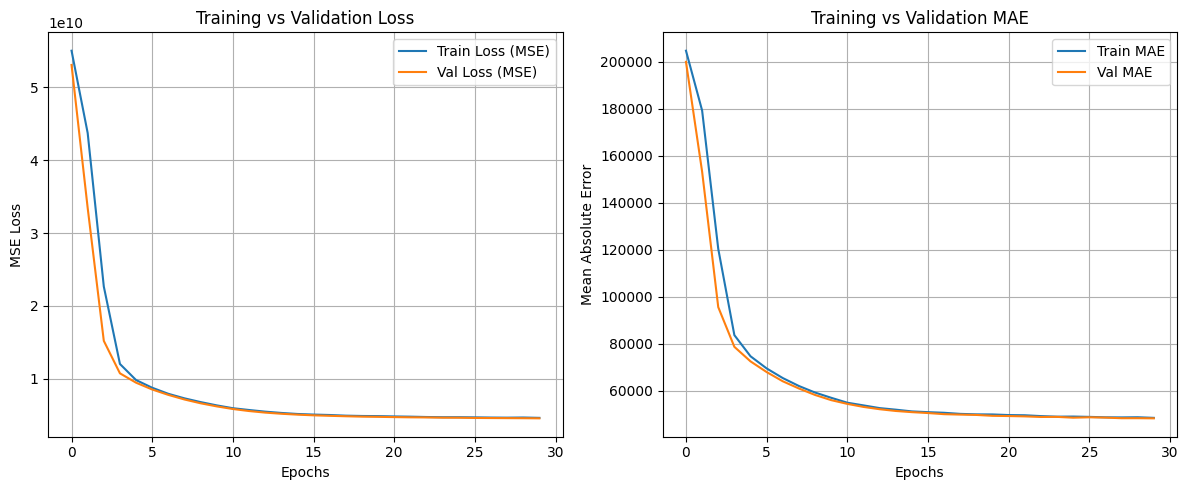

In [ ]:
#  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#  Load dataset
data = pd.read_csv("housing.csv")
print("Initial shape:", data.shape)

#  Drop missing values
data = data.dropna()

# One-hot encode the categorical column
data = pd.get_dummies(data, columns=["ocean_proximity"], drop_first=True)

#  Features and Target
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

#  Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

#  Define the Neural Network Model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer for regression

#  Compile the model with MSE loss and MAE metric
model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mae']  # mean absolute error
)

#  Add early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10)

#  Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Make predictions
y_pred = model.predict(X_test).flatten()

#  Evaluate results
mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n Test MSE: {mse:.2f}")
print(f" Test MAE: {mae:.2f}")
print(f" R² Score: {r2:.2f}")

#  Plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted Prices (Neural Net)")
plt.grid(True)
plt.tight_layout()
plt.show()

#  Plot Training and Validation Loss & MAE
plt.figure(figsize=(12, 5))

# MSE Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)

# MAE Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Training vs Validation MAE")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
